In [1]:
# this is using the positive/negative frequency data to find a correlation with the price change

In [2]:
import pandas as pd

In [83]:
# data date: 2018-1-09 ~ 2018-2-28
freq_data = pd.read_json("Frequency+Date(Oct102017-Mar172018).json")

In [14]:
def DateMatch(s):
    v = s.split(' ')
    ans = ""
    if v[0] == 'December':
        ans += '12/'
    elif v[0] == 'January':
        ans += '1/'
    elif v[0] == 'February':
        ans += '2/'
    elif v[0] == 'March':
        ans += '3/'
    else:
        ans += "WHAT"
    
    if (v[1][0] == '0'):
        ans += v[1][1] + '/'
    else:
        ans += v[1][:-1] +'/'
    
    return ans + v[2][2:]

In [85]:
freq_data = freq_data.loc[2:]
freq_data['Date'] = freq_data['Date'].apply(DateMatch) 

In [86]:
freq_data["FreqNum"] = freq_data["Frequency"] / freq_data["Number of News"] 
freq_data.sort_index(inplace=True)

In [87]:
price_data = pd.read_csv("AMZN1yr.csv")

In [88]:
#price_data.loc[price_data['Date']=='12/9/17'] # index 201
dataNeeded = price_data.merge(freq_data,on='Date')
dataNeeded['PriceChange'] = dataNeeded['Close'].diff()

In [89]:
#df = freq_data['FreqNum'].loc[::-1]
#df.index = range(len(dataNeeded))
#string(dataNeeded['Date'].iloc[0])


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

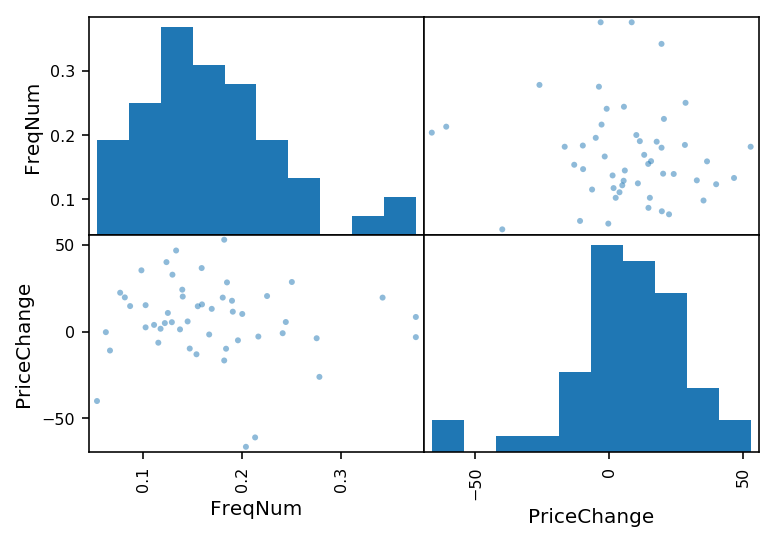

In [90]:
# scatter plot it
fig = pd.plotting.scatter_matrix(dataNeeded[['FreqNum','PriceChange']])
plt.show()

,FreqNum,PriceChange
FreqNum,1.000000,-0.103484
PriceChange,-0.103484,1.000000


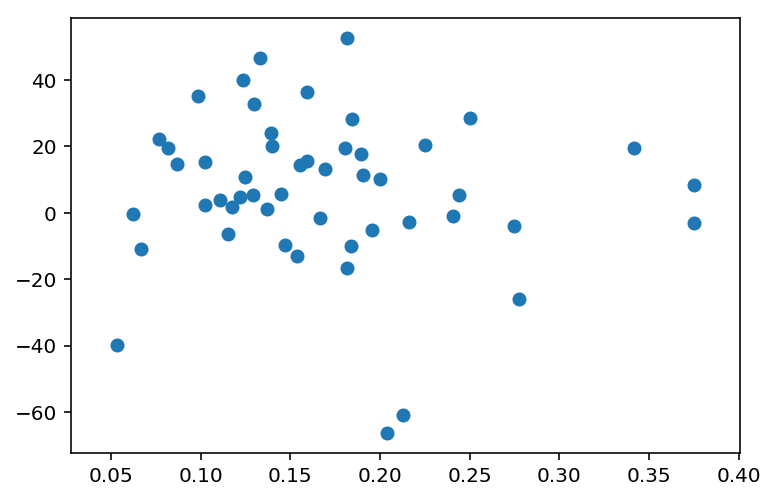

In [91]:
# we can see a little cluster there, which is what we wanted, im not sure
# if it's convincing enough
plt.scatter(dataNeeded['FreqNum'],dataNeeded['PriceChange'])
dataNeeded[['FreqNum','PriceChange']].corr()

In [92]:
from scipy.stats import pearsonr

In [93]:
stat, pval = pearsonr(dataNeeded['FreqNum'][1:],dataNeeded['PriceChange'][1:])
print("correlated (same day):", stat)
print('p val', pval)

correlated (same day): -0.103484325069
p val 0.474510004293


to yesterday's news: correlated: -0.25088720847
0.0820692602495


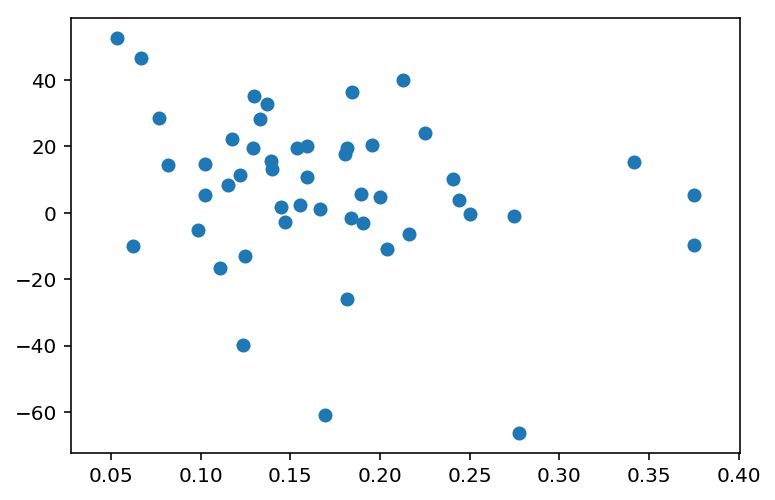

In [94]:
stat, pval = pearsonr(dataNeeded['FreqNum'][1:-1],dataNeeded['PriceChange'][2:])
plt.scatter(dataNeeded['FreqNum'][1:-1],dataNeeded['PriceChange'][2:])
print("to yesterday's news: correlated:", stat) # positively correlated
print(pval) 

# 90% confident that they are negatively slightly correlated.

In [76]:
dataNeeded['FreqChange'] = dataNeeded['FreqNum'].diff()
stat, pval = pearsonr(dataNeeded['FreqChange'][1:],dataNeeded['PriceChange'].loc[1:])
print("frequency change and price change: correlated:", stat) # positively correlated
print(pval) # not significant

frequency change and price change: correlated: 0.109070964466
0.450852338451


In [72]:
stat, pval = pearsonr(dataNeeded['FreqChange'][1:-1],dataNeeded['PriceChange'].loc[2:])
print("to yesterday's frequency change and today's price change: correlated:", stat) # positively correlated
print(pval) # not significant

to yesterday's frequency change and today's price change: correlated: -0.075434369285
0.60645236059


In [73]:
stat, pval = pearsonr(dataNeeded['FreqChange'][2:],dataNeeded['PriceChange'][1:-1])
print("to today frequency change and yesterday's price change: correlated:", stat) # positively correlated
print(pval) 

to today frequency change and yesterday's price change: correlated: 0.0739667899298
0.613492791499


In [74]:
stat, pval = pearsonr(dataNeeded['Frequency'][1:],dataNeeded['PriceChange'][1:])
print("correlated (Frequency vs. PriceChange):", stat)
print('p val', pval)

correlated (Frequency vs. PriceChange): -0.124744280283
p val 0.388058527181


In [75]:
stat, pval = pearsonr(dataNeeded['Number of News'][1:],dataNeeded['PriceChange'][1:])
print("correlated (Frequency vs. PriceChange):", stat)
print('p val', pval)

correlated (Frequency vs. PriceChange): -0.00161969967938
p val 0.991093139413
